ref:
https://www.datacamp.com/community/tutorials/finance-python-trading

In [1]:
%load_ext watermark
%watermark -p pandas,numpy,datetime,matplotlib,pandas_datareader

C:\Users\lissa\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


pandas 1.0.4
numpy 1.18.1
datetime 4.3
matplotlib 3.2.1
pandas_datareader 0.8.1


In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [3]:
def plot_avg(stock):
  # Initialize the plot figure
  fig = plt.figure()

  # Add a subplot and label for y-axis
  ax1 = fig.add_subplot(111,  ylabel='Price in $')

  # Plot the closing price
  stock['Close'].plot(ax=ax1, color='r', lw=2.)

  # Plot the short and long moving averages
  signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

  # Plot the buy signals
  ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
  # Plot the sell signals
  ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
  # Show the plot
  plt.show()

[*********************100%***********************]  1 of 1 completed
tsm


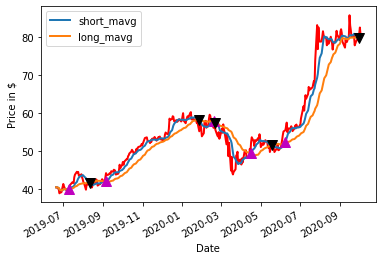

[*********************100%***********************]  1 of 1 completed
spy


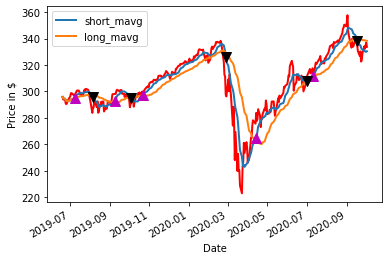

[*********************100%***********************]  1 of 1 completed
amd


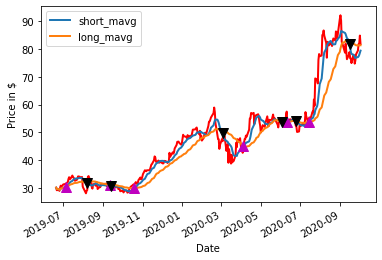

[*********************100%***********************]  1 of 1 completed
ko


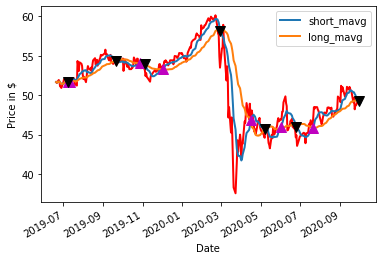

[*********************100%***********************]  1 of 1 completed
microsoft


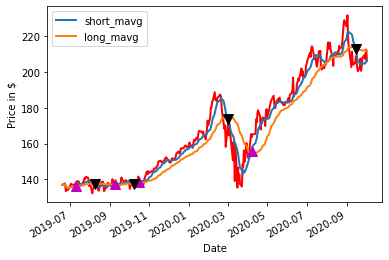

[*********************100%***********************]  1 of 1 completed
nvidia


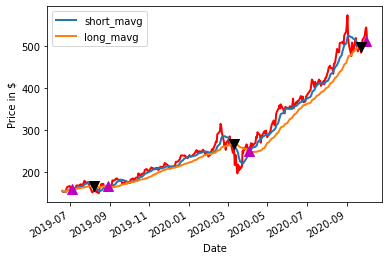

[*********************100%***********************]  1 of 1 completed
paypal


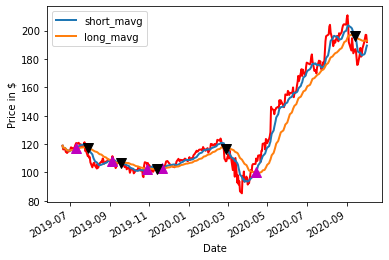

[*********************100%***********************]  1 of 1 completed
amat


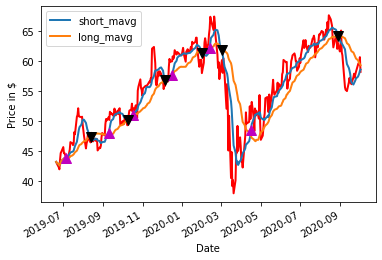

[*********************100%***********************]  1 of 1 completed
aapl


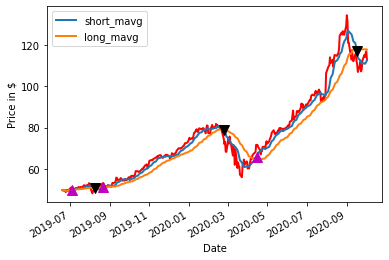

[*********************100%***********************]  1 of 1 completed
boa


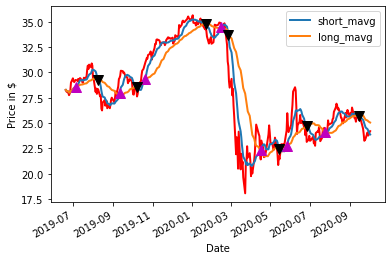

[*********************100%***********************]  1 of 1 completed
jpm


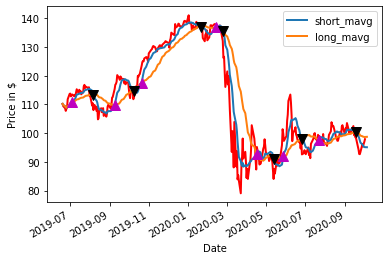

[*********************100%***********************]  1 of 1 completed
gld


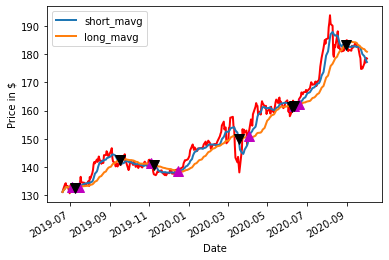

[*********************100%***********************]  1 of 1 completed
amzn


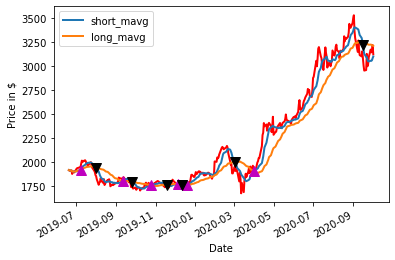

[*********************100%***********************]  1 of 1 completed
nike


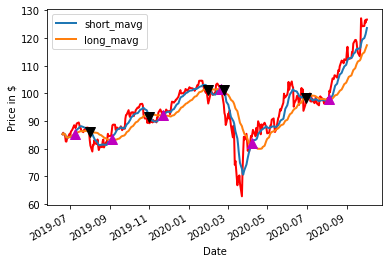

[*********************100%***********************]  1 of 1 completed
fb


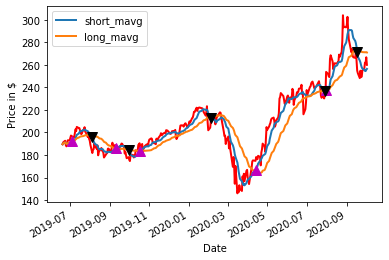

[*********************100%***********************]  1 of 1 completed
google


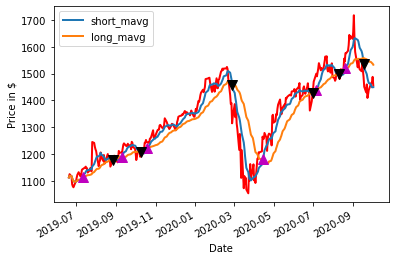

[*********************100%***********************]  1 of 1 completed
twitter


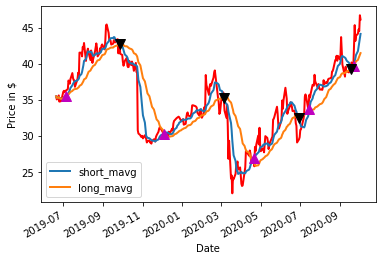

[*********************100%***********************]  1 of 1 completed
sell tesla
tesla


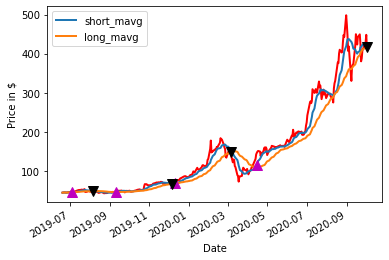

[*********************100%***********************]  1 of 1 completed
intel


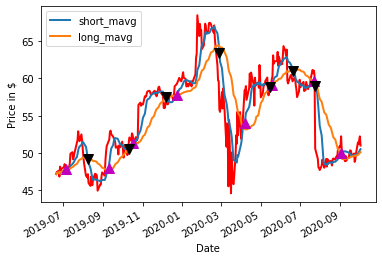

[*********************100%***********************]  1 of 1 completed
spg


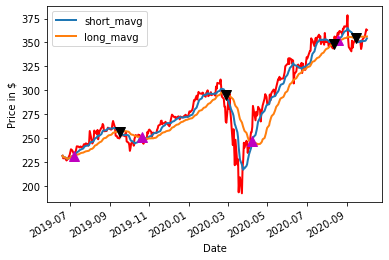

[*********************100%***********************]  1 of 1 completed
sell starbucks
starbucks


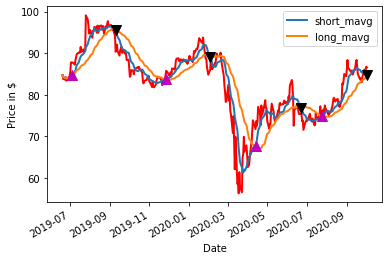

[*********************100%***********************]  1 of 1 completed
qqq


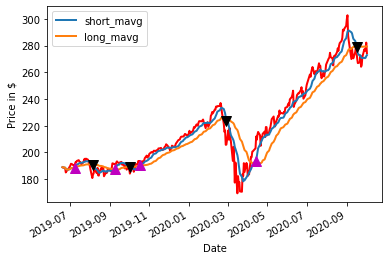

In [4]:
from pandas_datareader import data as pdr
import yfinance as yf
import datetime

start_date = datetime.datetime(2019, 6, 20)

yf.pdr_override()

# Initialize the short and long windows
short_window = 10
long_window = 30

stocks = {
  "tsm": "TSM",
  "spy": "SPY",
  "amd": "AMD",
  "ko" : "KO",
  "microsoft" :'MSFT',
  'nvidia' :'NVDA',
  'paypal' :'PYPL',
  'amat' : 'AMAT',
  'aapl' : 'AAPL', 
  'boa'  : 'BAC',    
  'jpm'  : 'JPM',
  'gld'  : 'GLD',
  'amzn' : 'AMZN',
  'nike' : 'NKE',
  'fb'   : 'FB', 
  'google':'GOOGL',
  'twitter':'TWTR',
  'tesla': 'TSLA',
  'intel': 'INTC',
  'spg'  : 'SPGI',
  'starbucks':'SBUX',
  'qqq' : 'QQQ',
  'square':'SQ',
  'adobe':'ADBE'
}

for stock in stocks:
    df = pdr.get_data_yahoo(stocks[stock], start = start_date, end = datetime.date.today())
    #df = pdr.get_data_yahoo(stocks[stock], start = start_date, end = datetime.datetime(2020, 9, 23))
    #print(stock)
    # Initialize the `signals` DataFrame with the `signal` column
    signals = pd.DataFrame(index=df.index)
    signals['signal'] = 0.0

    # Create short simple moving average over the short window
    signals['short_mavg'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

    # Create long simple moving average over the long window
    signals['long_mavg'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

    # Create signals
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

    # Generate trading orders
    signals['positions'] = signals['signal'].diff()
    if(signals['positions'][-1]==1):
        print('buy '+ str(stock))
        #plot_avg(df)
    if(signals['positions'][-1]==-1):
        print('sell '+ str(stock))
    print(str(stock))
    plot_avg(df)

In [21]:
from pandas_datareader import data as pdr
import yfinance as yf
import datetime

start_date = datetime.datetime(2019, 6, 20)

yf.pdr_override()

symbol = 'BSX'

stock = pdr.get_data_yahoo(symbol, start = start_date, end = datetime.date.today())

[*********************100%***********************]  1 of 1 completed


In [22]:
# Initialize the short and long windows
short_window = 10
long_window = 30

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=stock.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = stock['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = stock['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

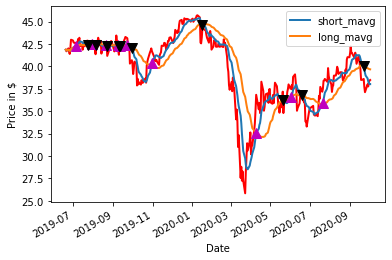

In [23]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
stock['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()